# Problem Statement - Loan Prediction


# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

# Reading the dataset 

In [58]:
df_train=pd.read_csv("E:/DS/vaibhav sir classes/Aug/29.8.21/training_set.csv")
df_test=pd.read_csv("E:/DS/vaibhav sir classes/Aug/29.8.21/testing_set.csv")

# Exploratory Data Analysis (EDA)

In [59]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [60]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [61]:
df_train.shape

(614, 13)

In [62]:
df_test.shape

(367, 12)

In [63]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [64]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [65]:
df_train.isnull().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [66]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [67]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,612.000000,613.000000,592.000000,600.00000,564.000000
mean,5405.540850,1620.888940,146.412162,342.00000,0.842199
std,6118.914057,2928.624748,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2875.750000,0.000000,100.000000,360.00000,1.000000
50%,3806.000000,1167.000000,128.000000,360.00000,1.000000
75%,5803.750000,2302.000000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [68]:
df_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


From Exploratory Data Analysis (EDA) few points were noted. 

    1. Total of 13 columns and 614 rows in train set.
    2. Total of 12 coloumn and 367 rows in the test set.
    3. A total ot 8 columns are of Type ='Object' which are categorical. 
    4. A total ot 5 columns are of Type ='int' and 'float' which are continuous.
    5. 11 columns in the train data set have missing values.
    6. 6 columns in the test data set have missing values.
    7. 81000 is the maximum value of applicant's income. 
    8. The range of loan amount term is 6 to 480.
    9. Loan amount range is 28 to 550. 

# Data Preprocessing 
Seperating categorical and continous columns

In [69]:
cat_train=[]
con_train=[]
for i in df_train.columns:
    if (df_train[i].dtypes=="object"):
        cat_train.append (i)
    else:
        con_train.append (i)   

In [70]:
cat_test=[]
con_test=[]
for i in df_test.columns:
    if (df_test[i].dtypes=="object"):
        cat_test.append (i)
    else:
        con_test.append (i)   

In [71]:
cat_train

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [72]:
con_train

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

# Treatment of missing values

In [73]:
for i in con_train:
    replacer = df_train[i].mean()
    df_train[i] = df_train[i].fillna(replacer)
for i in cat_train:
    replacer = pd.DataFrame(df_train[i].value_counts()).index[0]
    df_train[i] = df_train[i].fillna(replacer)

In [74]:
for i in con_test:
    replacer = df_test[i].mean()
    df_test[i] = df_test[i].fillna(replacer)
for i in cat_test:
    replacer = pd.DataFrame(df_test[i].value_counts()).index[0]
    df_test[i] = df_test[i].fillna(replacer)

In [75]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [76]:
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Univariate Analysis

<Figure size 432x288 with 0 Axes>

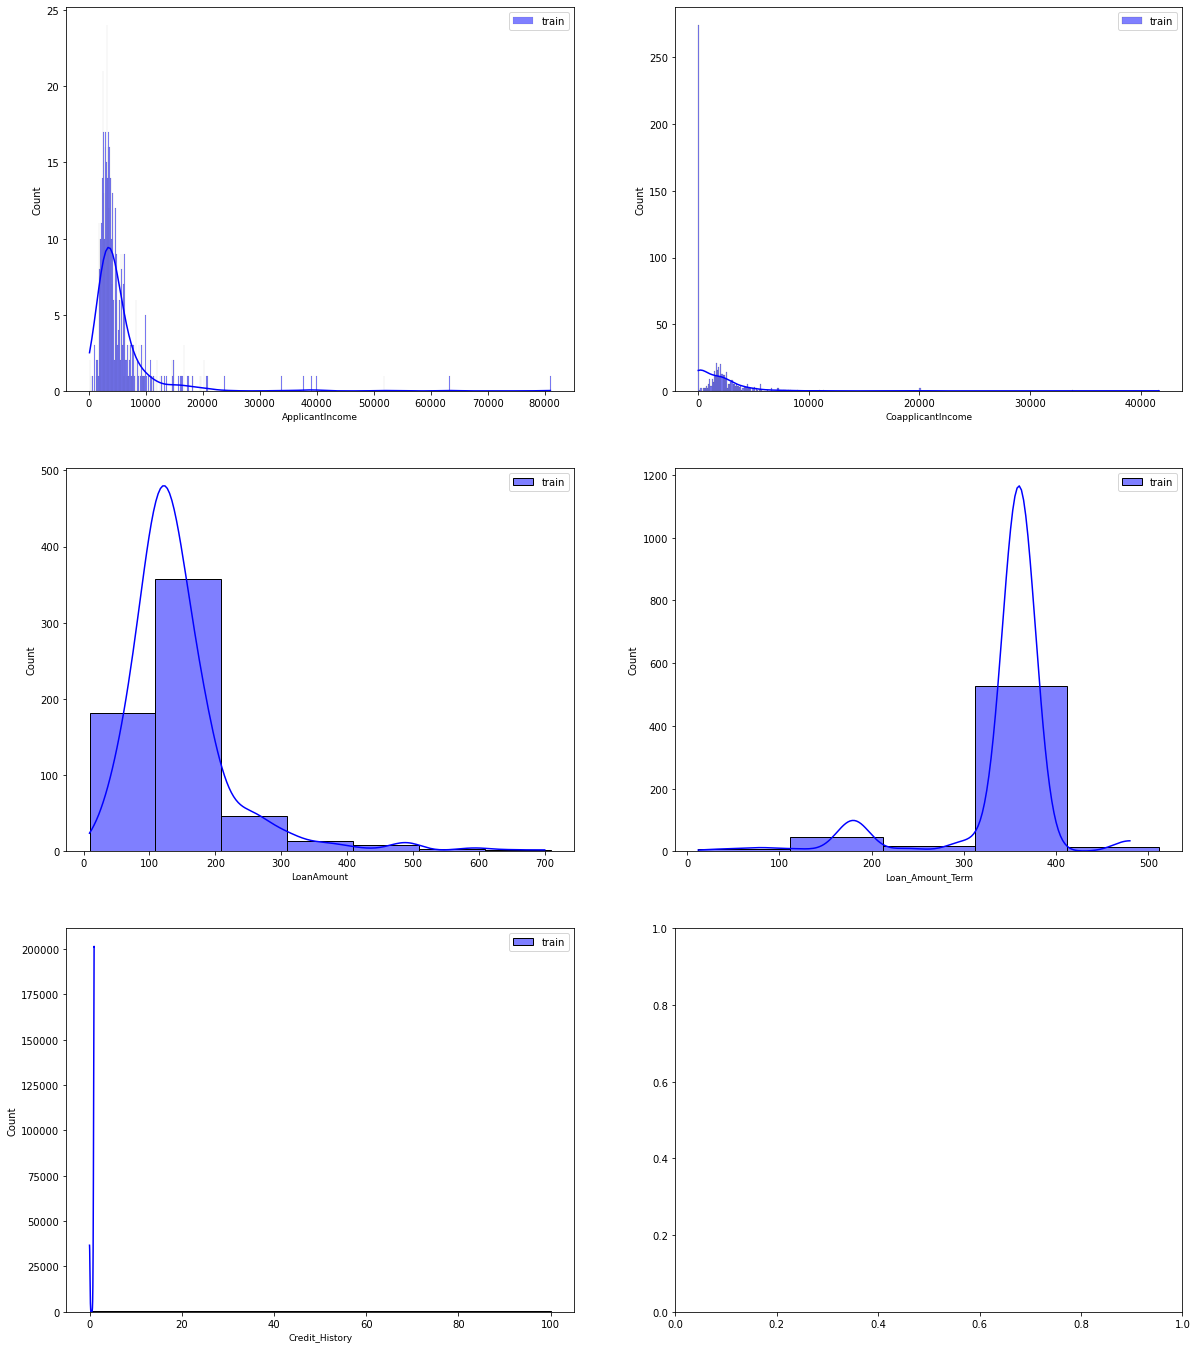

In [77]:
i=1
plt.figure()
fig, ax = plt.subplots(3, 2,figsize=(20, 24))
for feature in con_train:
    plt.subplot(3, 2,i)
    sns.histplot(df_train[feature],color="blue", binwidth=100, kde=True,bins=100, label='train')
    plt.xlabel(feature, fontsize=9); plt.legend()
    i += 1
plt.show()

<Figure size 432x288 with 0 Axes>

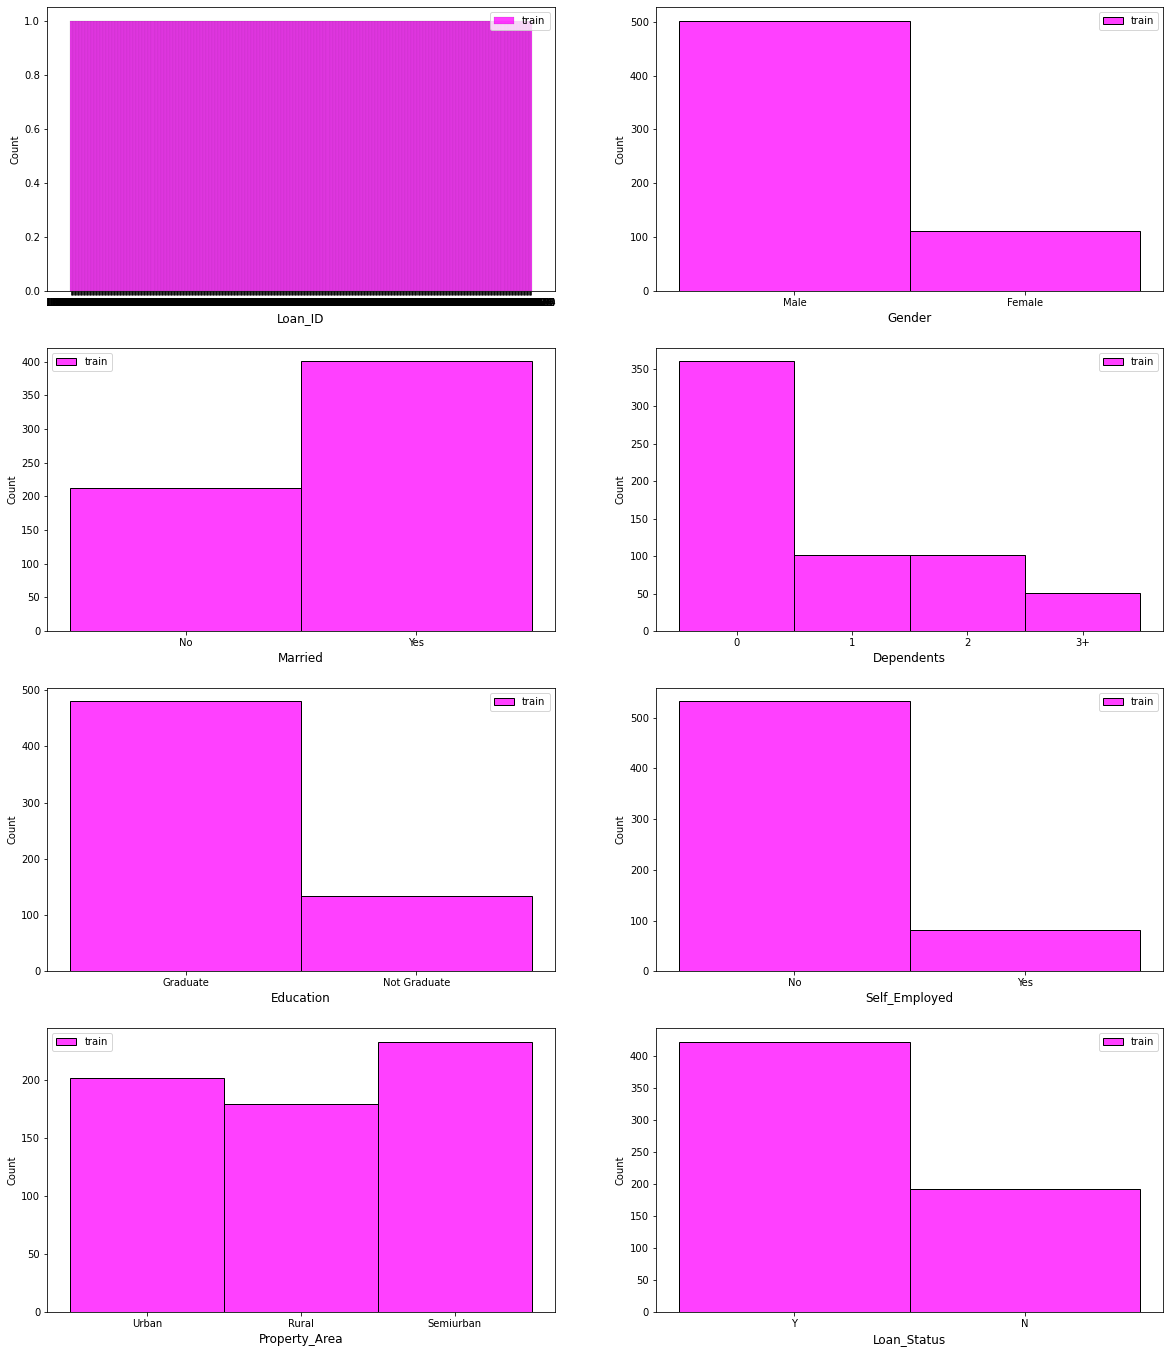

In [78]:
# Categorical features distribution 
i = 1
plt.figure()
fig, ax = plt.subplots(4, 2,figsize=(20, 24))
for feature in cat_train:
    plt.subplot(4, 2,i)
    sns.histplot(df_train[feature],color="magenta", label='train')
    plt.xlabel(feature, fontsize=12); plt.legend()
    i += 1
plt.show()

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

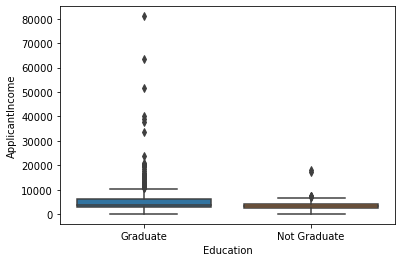

In [79]:
sns.boxplot(x='Education',y='ApplicantIncome',data=df_train)

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

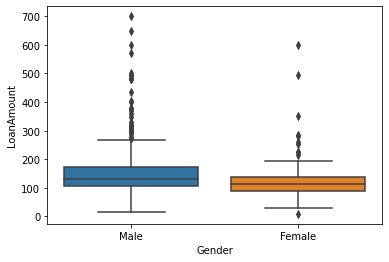

In [80]:
sns.boxplot(x='Gender',y='LoanAmount',data=df_train)

<AxesSubplot:xlabel='Married', ylabel='ApplicantIncome'>

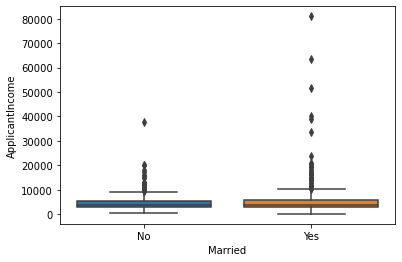

In [81]:
sns.boxplot(x='Married',y='ApplicantIncome',data=df_train)

In [82]:
df_train.Dependents.replace(to_replace="3+", value="4", inplace= True)

<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

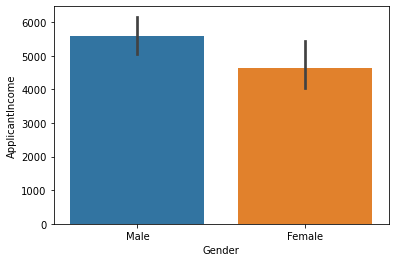

In [83]:
sns.barplot(x='Gender',y='ApplicantIncome',data=df_train)

In [85]:
df_train[df_train.Loan_Status=='Y'][df_train.Gender=='Male'][df_train.Education=='Graduate'][df_train.Married=='Yes'][df_train.Property_Area=='Semiurban'][df_train.Self_Employed=='No']

<ipython-input-85-937660a7bd50>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train[df_train.Loan_Status=='Y'][df_train.Gender=='Male'][df_train.Education=='Graduate'][df_train.Married=='Yes'][df_train.Property_Area=='Semiurban'][df_train.Self_Employed=='No']


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
26,LP001068,Male,Yes,0,Graduate,No,2799.0,2253.0,122.0,360.0,1.0,Semiurban,Y
33,LP001098,Male,Yes,0,Graduate,No,3500.0,1667.0,114.0,360.0,1.0,Semiurban,Y
43,LP001131,Male,Yes,0,Graduate,No,3941.0,2336.0,134.0,360.0,1.0,Semiurban,Y
55,LP001194,Male,Yes,2,Graduate,No,2708.0,1167.0,97.0,360.0,1.0,Semiurban,Y
56,LP001195,Male,Yes,0,Graduate,No,2132.0,1591.0,96.0,360.0,1.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,LP002792,Male,Yes,1,Graduate,No,5468.0,1032.0,26.0,360.0,1.0,Semiurban,Y
558,LP002798,Male,Yes,0,Graduate,No,3887.0,2669.0,162.0,360.0,1.0,Semiurban,Y
580,LP002892,Male,Yes,2,Graduate,No,6540.0,0.0,205.0,360.0,1.0,Semiurban,Y
590,LP002928,Male,Yes,0,Graduate,No,3000.0,3416.0,56.0,180.0,1.0,Semiurban,Y


# Out of 92 applicants who were male, married, graduate, residing in semiurban area and were not self employed 72 got the loan approved i.e. 78.26 %.


# Based on the above study categories of applicants can be divided as 

        1. Male applicants who are graduate have more chances of loan approval.
        2. Applicants living in semiurban  have more chances of loan approval.
        3. Applicants having good income of self and coapplicant and less no of dependents have  have more chances of loan 
            approval.
        4. Applicants who are married and self employed  have more chances of loan approval.

In [29]:
#Features correlation
corr = df_train[con_train+['Loan_Status']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.00,-0.12,0.57,-0.05,-0.01
CoapplicantIncome,-0.12,1.00,0.19,-0.06,-0.00
LoanAmount,0.57,0.19,1.00,0.04,-0.01
Loan_Amount_Term,-0.05,-0.06,0.04,1.00,0.00
Credit_History,-0.01,-0.00,-0.01,0.00,1.00


In [30]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [31]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban,Y


In [32]:
ordinal_encoder = OrdinalEncoder()
df_train[cat_train] = ordinal_encoder.fit_transform(df_train[cat_train])

In [33]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849.00000,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,5405.54085,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000.00000,0.0,66.000000,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583.00000,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000.00000,0.0,141.000000,360.0,1.0,2.0,1.0


In [34]:
df_train.drop(labels= "Loan_ID", axis=1, inplace= True)

In [35]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849.00000,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,5405.54085,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000.00000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583.00000,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000.00000,0.0,141.000000,360.0,1.0,2.0,1.0


# Normalizing the data

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train = pd.DataFrame(scaler.fit_transform(df_train),columns=df_train.columns)
df_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.198860,0.743590,1.0,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.065004,0.036192,0.172214,0.743590,1.0,0.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.743590,1.0,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.743590,1.0,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.743590,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.000000,0.0,0.0,0.034014,0.000000,0.089725,0.743590,1.0,0.0,1.0
610,1.0,1.0,1.000000,0.0,0.0,0.048930,0.000000,0.044863,0.358974,1.0,0.0,1.0
611,1.0,1.0,0.333333,0.0,0.0,0.097984,0.005760,0.353111,0.743590,1.0,1.0,1.0
612,1.0,1.0,0.666667,0.0,0.0,0.091936,0.000000,0.257598,0.743590,1.0,1.0,1.0


# Correlation of all categorical and continuous features

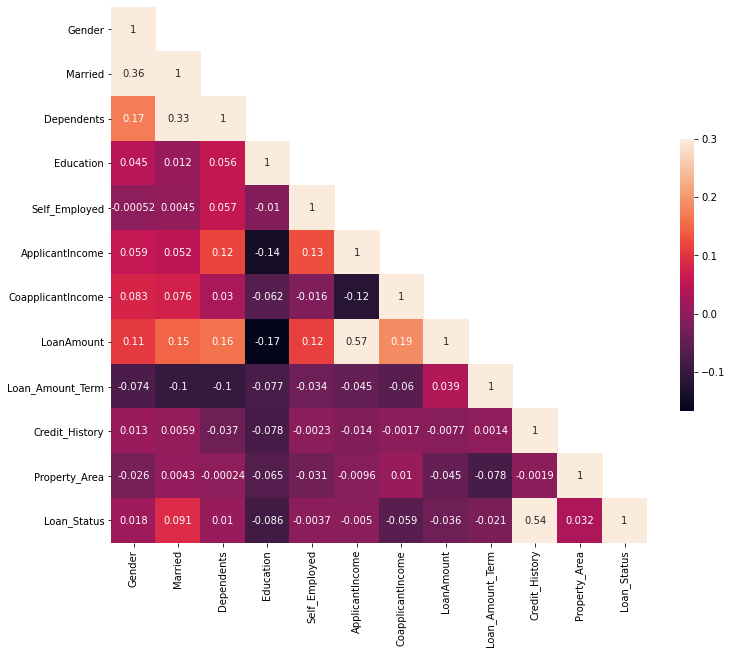

In [37]:
corrMatrix = df_train.corr(method='pearson', min_periods=1)
plt.figure(figsize=(12,10))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrMatrix, dtype=bool), k=1)
ax = sns.heatmap(corrMatrix, square=True, vmax=.3, annot=True, mask=mask, cbar_kws={"shrink": .5})
plt.show()

    Observations from the correlation heatmap
        1. Loan Status has highest correlation with the Credit History
        2. Loan amount had excellent corrlelation with Applicant's Income and good correlation with coapplicant income, no. 
            of dependents, gender and Marital Status.
        3. Applicant's income has direct correlation wit the no. of dependents and employment type. 

# Feature and Target Selection 

In [38]:
x= df_train.drop(labels= "Loan_Status", axis=1)
Y=df_train["Loan_Status"]

# Split of data into training and testing 

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,Y_train,Y_test= train_test_split(x,Y, test_size= 0.2, random_state= 54)

In [40]:
x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
59,1.0,1.0,0.666667,1.0,0.0,0.039666,0.068615,0.195369,0.743590,1.0,1.0
32,1.0,0.0,0.333333,0.0,1.0,0.056178,0.000000,0.140376,0.743590,1.0,0.0
414,0.0,1.0,0.000000,1.0,0.0,0.024725,0.077687,0.244573,0.743590,0.0,0.5
559,0.0,1.0,0.000000,0.0,0.0,0.049845,0.055344,0.250362,0.743590,1.0,0.5
286,0.0,0.0,0.000000,0.0,1.0,0.030303,0.041208,0.130246,0.615385,1.0,0.5


# Model Creation 

In [41]:
# Linear Regration 
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model_LR=lr.fit(x_train,Y_train)
pred=model_LR.predict(x_test)

In [42]:
model_LR.score(x_train,Y_train)

0.8044806517311609

In [43]:
# Decesion Tree Classifier 
decision_tree = DecisionTreeClassifier(max_depth = 7)
model_DT= decision_tree.fit(x_train, Y_train)
Y_pred = model_DT.predict(x_test)
model_DT.score(x_train, Y_train)

0.869653767820774

In [44]:
#Random Forest Classifier 
random_forest = RandomForestClassifier(n_estimators = 14, max_depth=19, random_state=54)
model_RF= random_forest.fit(x_train, Y_train)
y_pred = model_RF.predict(x_test)
model_RF.score(x_train, Y_train)

0.9918533604887984

In [45]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban


In [46]:
df_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [47]:
ordinal_encoder = OrdinalEncoder()
df_test[cat_test] = ordinal_encoder.fit_transform(df_test[cat_test])

In [48]:
scaler = MinMaxScaler()
df_test = pd.DataFrame(scaler.fit_transform(df_test),columns=df_test.columns)
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.000000,1.0,1.0,0.000000,0.0,0.0,0.078865,0.000000,0.157088,0.746835,1.000000,1.0
1,0.002732,1.0,1.0,0.333333,0.0,0.0,0.042411,0.062500,0.187739,0.746835,1.000000,1.0
2,0.005464,1.0,1.0,0.666667,0.0,0.0,0.068938,0.075000,0.344828,0.746835,1.000000,1.0
3,0.008197,1.0,1.0,0.666667,0.0,0.0,0.032263,0.106083,0.137931,0.746835,0.825444,1.0
4,0.010929,1.0,0.0,0.000000,1.0,0.0,0.045168,0.000000,0.095785,0.746835,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
362,0.989071,1.0,1.0,1.000000,1.0,1.0,0.055274,0.074042,0.162835,0.746835,1.000000,1.0
363,0.991803,1.0,1.0,0.000000,0.0,0.0,0.057329,0.029542,0.166667,0.746835,1.000000,1.0
364,0.994536,1.0,0.0,0.000000,0.0,0.0,0.044810,0.083042,0.187739,0.746835,0.825444,0.5
365,0.997268,1.0,1.0,0.000000,0.0,0.0,0.068938,0.099708,0.249042,0.746835,1.000000,0.0


In [49]:
df_test.drop(labels='Loan_ID', axis=1,  inplace=True)

In [50]:
pred_1= lr.predict(df_test)

In [51]:
df_test['Loan_Status']= pred_1

In [52]:
df_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,1.0,0.000000,0.0,0.0,0.078865,0.000000,0.157088,0.746835,1.000000,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.042411,0.062500,0.187739,0.746835,1.000000,1.0,1.0
2,1.0,1.0,0.666667,0.0,0.0,0.068938,0.075000,0.344828,0.746835,1.000000,1.0,1.0
3,1.0,1.0,0.666667,0.0,0.0,0.032263,0.106083,0.137931,0.746835,0.825444,1.0,1.0
4,1.0,0.0,0.000000,1.0,0.0,0.045168,0.000000,0.095785,0.746835,1.000000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
362,1.0,1.0,1.000000,1.0,1.0,0.055274,0.074042,0.162835,0.746835,1.000000,1.0,1.0
363,1.0,1.0,0.000000,0.0,0.0,0.057329,0.029542,0.166667,0.746835,1.000000,1.0,1.0
364,1.0,0.0,0.000000,0.0,0.0,0.044810,0.083042,0.187739,0.746835,0.825444,0.5,1.0
365,1.0,1.0,0.000000,0.0,0.0,0.068938,0.099708,0.249042,0.746835,1.000000,0.0,1.0


In [53]:
df_test.Loan_Status.replace( to_replace=1,value="Yes",inplace= True)

In [54]:
df_test.Loan_Status.replace( to_replace=0,value="No",inplace= True)

In [55]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,1.0,0.000000,0.0,0.0,0.078865,0.000000,0.157088,0.746835,1.000000,1.0,Yes
1,1.0,1.0,0.333333,0.0,0.0,0.042411,0.062500,0.187739,0.746835,1.000000,1.0,Yes
2,1.0,1.0,0.666667,0.0,0.0,0.068938,0.075000,0.344828,0.746835,1.000000,1.0,Yes
3,1.0,1.0,0.666667,0.0,0.0,0.032263,0.106083,0.137931,0.746835,0.825444,1.0,Yes
4,1.0,0.0,0.000000,1.0,0.0,0.045168,0.000000,0.095785,0.746835,1.000000,1.0,Yes


In [56]:
df_test.where(df_test['Loan_Status']== 'No').dropna()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
7,1.0,1.0,0.666667,1.0,0.0,0.053510,0.000000,0.227969,0.746835,0.000000,0.0,No
13,1.0,1.0,0.666667,0.0,0.0,0.167836,0.000000,0.264368,0.746835,0.000000,0.5,No
25,1.0,0.0,0.000000,0.0,0.0,0.000000,1.000000,0.229885,0.746835,0.000000,0.0,No
35,1.0,0.0,0.000000,0.0,0.0,0.043431,0.000000,0.283525,0.746835,0.000000,0.5,No
55,1.0,0.0,0.000000,0.0,0.0,0.037916,0.000000,0.195402,0.746835,0.000000,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
325,1.0,0.0,0.000000,0.0,0.0,0.039639,0.100667,0.128352,0.000000,0.000000,0.5,No
339,0.0,0.0,0.000000,0.0,0.0,0.059742,0.097208,0.256705,0.746835,0.000000,0.0,No
346,1.0,1.0,0.000000,0.0,0.0,0.046754,0.081917,0.201149,0.746835,0.000000,0.0,No
351,1.0,0.0,0.000000,0.0,0.0,0.031477,0.625000,0.149425,0.746835,0.825444,0.0,No


In [100]:
df_train[['Loan_Status', 'LoanAmount', 'Loan_Amount_Term']].groupby('Loan_Status', as_index = False).describe()

LoanAmount                                                            \
       count        mean        std   min     25%    50%    75%    max   
0      192.0  150.945488  83.361163   9.0  102.75  133.5  173.0  570.0   
1      422.0  144.349606  84.361109  17.0  100.00  128.0  160.0  700.0   

  Loan_Amount_Term                                                           
             count        mean        std   min    25%    50%    75%    max  
0            192.0  344.000000  68.143673  36.0  360.0  360.0  360.0  480.0  
1            422.0  341.090047  62.644087  12.0  360.0  360.0  360.0  480.0